**Proyecto Final Data Science 1 - Penizzotto Javier**

**1) Objetivo del Análisis**

El objetivo principal de este análisis es predecir la probabilidad de supervivencia de un paciente con insuficiencia cardíaca, basándose en un conjunto de variables clínicas que han mostrado una correlación significativa con el desenlace del paciente (Death Event).
A través del uso de modelos de Machine Learning supervisado, se busca identificar patrones y relaciones ocultas entre las variables clínicas más relevantes y el desenlace de los pacientes, para así ayudar en la toma de decisiones médicas más informadas y proactivas.

La base de datos seleccionada contiene los registros médicos de 5000 pacientes que padecieron insuficiencia cardíaca, recopilados durante su período de seguimiento, donde cada perfil de paciente tiene 13 características clínicas. La idea es utilizar estos datos y el modelo para predecir si un paciente sobrevivirá o no.
Tengo 5000 registros de pacientes, un volumen inicial de datos razonable para explorar y desarrollar modelos predictivos utilizando técnicas de aprendizaje automático, es un buen tamaño inicial para entrenar un modelo. Cuanto más grande sea el conjunto de datos, generalmente mejor será la capacidad del modelo para generalizar y capturar patrones.





**2) Hipótesis**

H1: Los pacientes con Ejection Fraction baja tienen mayor probabilidad de no sobrevivir.

H2: Altos niveles de Serum Creatinine están asociados con una mayor tasa de mortalidad.

H3: El tiempo de seguimiento (Time) más largo se asocia con una mayor probabilidad de supervivencia.

H4: La edad avanzada incrementa el riesgo de fallecimiento por insuficiencia cardíaca.

H5: Niveles bajos de Serum Sodium pueden predecir una mayor mortalidad.

Estas hipótesis podrán ser validadas o refutadas mediante el entrenamiento y evaluación del modelo predictivo.

**3) Contexto Comercial**

En el sector de la salud, especialmente en el área de cardiología, los profesionales se enfrentan a la necesidad de tomar decisiones críticas basadas en múltiples variables clínicas. La implementación de modelos predictivos puede mejorar la eficiencia en la evaluación de riesgo y ofrecer asistencia temprana a pacientes de alto riesgo, optimizando el uso de los recursos hospitalarios, como camas de cuidados intensivos, seguimiento médico y tratamientos preventivos.

**4) Problema Comercial a Resolver**

Las instituciones de salud enfrentan desafíos en la detección temprana de pacientes con alto riesgo de mortalidad por insuficiencia cardíaca. Este retraso puede derivar en tratamientos tardíos, incremento de costos hospitalarios y disminución en la calidad de atención.

Con este modelo predictivo, se puede:

- Priorizar la atención de los pacientes con mayor riesgo.

- Personalizar los planes de tratamiento.

- Reducir reingresos hospitalarios innecesarios.

- Optimizar los recursos clínicos mediante una mejor planificación.

**5) Parte 1: Selección y Análisis de la Base de Datos**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records.csv to heart_failure_clinical_records.csv


**Exploración de Datos (EDA)**

In [3]:
import pandas as pd

# Se cargan los datos de un archivo CSV y ajustamos los nombres de las columnas.
df = pd.read_csv('heart_failure_clinical_records.csv', delimiter=',', decimal='.')
df.columns = ['Age','Anaemia','CPK','Diabetes','Ejection Fraction','High Blood Pressure','Platelets','Serum Creatinine','Serum Sodium','Sex','Smoking','Time','Death Event']

df.head() # Primeras filas del DataFrame

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
df.tail(10) # Ultimas 10 filas de los registros de los pacientes.

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
4990,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209,0
4991,53.0,1,582,0,45,0,305000.0,1.1,137,1,1,209,0
4992,65.0,1,335,0,35,1,235000.0,0.8,136,0,0,120,0
4993,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4994,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4999,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


**Análisis de los datos del DataFrame**

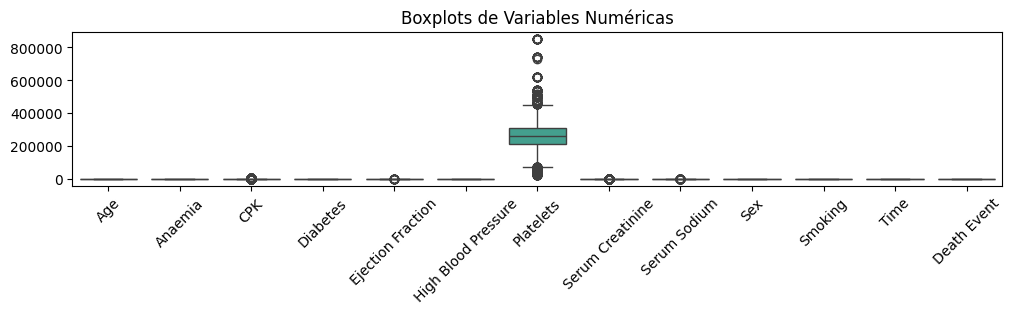

Número de Filas con Valores Atípicos: 1172


In [5]:
import numpy as np
import seaborn as sns               #Representan los valores atípicos automáticamente en un boxplot con Seaborn y Matplotlib
import matplotlib.pyplot as plt

# Se seleccionan solo las columnas numéricas para el análisis de valores atípicos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear boxplots para cada variable numérica
#El boxplot me permite visualizar la dispersión, la mediana y la presencia de valores atípicos
plt.figure(figsize=(12, 2))
sns.boxplot(data=df[numeric_columns])          #Los gráficos de caja(boxplot) muestran la mediana, los cuartiles y los valores atípicos de los datos
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos utilizando el criterio del IQR
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Contar el número de valores atípicos por fila
num_outliers = outliers.sum()
print("Número de Filas con Valores Atípicos:", num_outliers)

#La caja central para cada variable representa el rango intercuartílico (IQR), que va desde el primer cuartil (Q1) al tercer cuartil (Q3).
#La línea dentro de la caja representa la mediana (Q2) de los datos para esa variable
#Los valores atipicos son los puntos individuales que se pueden observar en las variables.

La caja central para cada variable representa el rango intercuartílico (IQR), que va desde el primer cuartil (Q1) al tercer cuartil (Q3).

La línea dentro de la caja representa la mediana (Q2) de los datos para esa variable

Los valores atipicos son los puntos individuales que se pueden observar en las variables.

En la representación grafica anterior podemos ver que la variables Platelets tiene una gran cantidad de valores atipicos (outliers).

Ejection Fraction, Serum Creatinine, Serum Sodium y 'CPK': También muestran algunos outliers, pero no tantos como 'Platelets'.

La mayoría de las otras variables tienen distribuciones mucho más ajustadas con pocos o ningún outlier visible en esta escala.

**Calculos Estadísticos**

In [6]:
# Calcular la mediana de cada columna numérica
medians = df[numeric_columns].median()

# Mostrar las medianas de las variables numéricas
print("\n\tMediana de Variables Numéricas:\n", medians)


	Mediana de Variables Numéricas:
 Age                        60.00
Anaemia                     0.00
CPK                       248.00
Diabetes                    0.00
Ejection Fraction          38.00
High Blood Pressure         0.00
Platelets              263358.03
Serum Creatinine            1.10
Serum Sodium              137.00
Sex                         1.00
Smoking                     0.00
Time                      113.00
Death Event                 0.00
dtype: float64


In [7]:
df.describe() # Resumen estadistico

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


A continuación se normalizan los datos con StandardScaler para asegurar que todas las características contribuyan de manera equilibrada al entrenamiento del modelo.

StandardScaler convierte cada valor en el DataFrame, para cada valor en la columna, se resta la media de esa columna y luego se divide por la desviación estándar de esa misma columna, transformando los datos para que tengan una media de 0 y una desviación estándar de 1.

In [8]:
from sklearn.preprocessing import StandardScaler

# Ajustar y transformar los datos con StandardScaler
scaler = StandardScaler()
df_n = scaler.fit_transform(df)   # El resultado es un array
# Convertir el array normalizado de vuelta a un DataFrame de pandas
df_n = pd.DataFrame(df_n, columns=df.columns)
# Mostrar el DataFrame normalizado
df_n.head()

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,-0.452181,-0.950046,0.165097,-0.885327,0.631022,-0.757831,-0.017526,-0.068446,0.042968,0.740909,1.485659,-0.551989,-0.675926
1,0.402807,-0.950046,-0.543458,-0.885327,-1.106039,-0.757831,0.407436,3.596194,-1.525206,0.740909,-0.673102,0.987105,-0.675926
2,-1.307168,-0.950046,-0.004874,1.129527,0.023051,-0.757831,0.550307,-0.464623,0.715043,-1.349693,-0.673102,1.465647,-0.675926
3,-0.024687,1.052581,0.171240,1.129527,0.196757,1.319556,0.642154,-0.167490,-2.421306,0.740909,-0.673102,-0.526122,-0.675926
4,2.967771,1.052581,-0.004874,-0.885327,-0.671773,-0.757831,1.999435,0.624865,-1.077157,0.740909,-0.673102,-1.043465,1.479451


A**nalizamos la correlación de los datos con el DataFrame normalizado "df_n"**

In [9]:
df_n.corr(method='pearson')

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
Age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
Anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
CPK,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
Diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
Ejection Fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
High Blood Pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
Platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
Serum Creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
Serum Sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
Sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


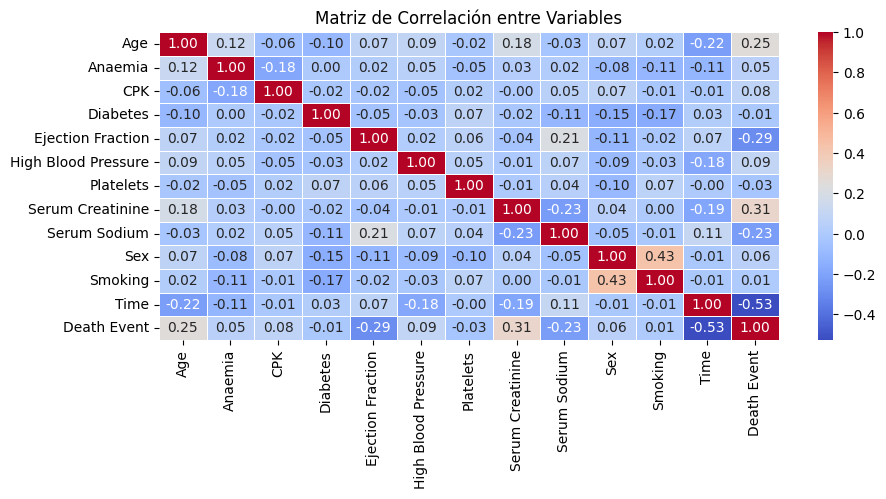

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sns.heatmap(df_n.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

Muchas variables no estan fuertemente correlacionadas con la variable que me interesa Death Event.

Las variables que muestran una correlación moderada con Death Event son:

Age: La edad avanzada se asocia con un mayor riesgo de muerte en pacientes con insuficiencia cardíaca.

Ejection Fraction: La fracción de eyección mide el porcentaje de sangre que el ventrículo izquierdo expulsa con cada contracción. Una fracción de eyección baja indica una función cardíaca deficiente, lo que se asocia con un mayor riesgo de complicaciones y muerte en pacientes con insuficiencia cardíaca.

Serum Creatinine: Los niveles elevados de creatinina en sangre indican una función renal deficiente. La insuficiencia renal es un factor de riesgo significativo para el pronóstico en pacientes con insuficiencia cardíaca, ya que ambos órganos están estrechamente relacionados en su función.

Serum Sodium: Los niveles de sodio en sangre pueden reflejar el estado de hidratación y la función renal. La hiponatremia (bajo nivel de sodio) es un marcador común en pacientes con insuficiencia cardíaca avanzada y se asocia con un peor pronóstico.

Time: El seguimiento del tiempo desde el diagnóstico o desde el inicio de un tratamiento específico puede proporcionar información sobre la progresión de la enfermedad y la efectividad de las intervenciones terapéuticas.
Por lo tanto estas variables pueden ser importantes para evaluar el riesgo de muerte en pacientes con insuficiencia cardíaca.

Es bueno saber que la correlación de Platelets con Death Event es baja ya que esta presentaba mayor cantidad de valores atipicos, por lo tanto no lo consideramos para los valores de entrada de la Red Neuronal, ya que pueden distorsionar la representación de los datos y afectar negativamente el proceso de entrenamiento y la capacidad de generalización del modelo.

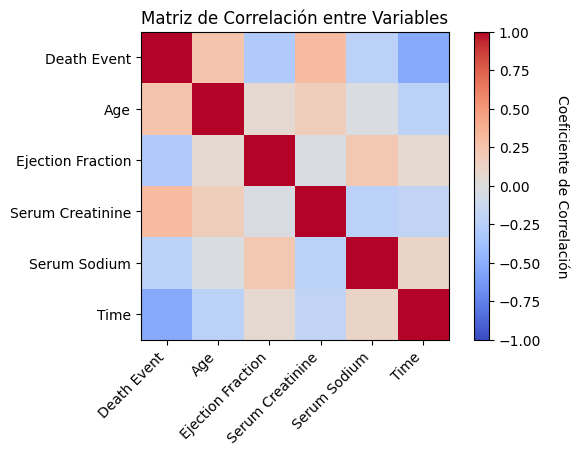

In [11]:
# Analizamos la correlación de las columnas que me interesan mediante un mapa de calor.

data = ['Age', 'Ejection Fraction', 'Serum Creatinine', 'Serum Sodium', 'Time']  # Variables a considerar
labels = df_n.loc[:, ["Death Event"] + data].columns.to_list()
corr_matrix = df_n.loc[:, ["Death Event"] + data].corr().to_numpy()
fig, ax = plt.subplots(figsize=(8, 4))
cax = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
cbar = fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Coeficiente de Correlación', rotation=270, labelpad=20)
plt.title('Matriz de Correlación entre Variables')
plt.show()

**6) Parte 2: Entrenamiento y Prueba del Modelo - Selección del Algoritmo Adecuado**

- Se consideran solo las columnas que me interesan, de acuerdo al analisis de datos realizado anteriormente. En conclusión, las variables que muestran una correlación moderada con la variable que me interesa Death Event son: Age / Ejection Fraction / Serum Creatinine / Serum Sodium / Time. De esta forma quite la variable Platelets y CPK, ya que estas presentaban mayor cantidad de valores atipicos.

- Se Dividieron los datos en conjuntos de entrenamiento y prueba.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df[data].values #Tomo los datos obtenidos del Análisis de Datos, reduciendo la cantidad de columnas a las que más correlación tienen.
Y = df['Death Event'].values #Variable que interesa para el análisis.

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Número de registros de entrenamiento
n = X_train.shape[0]
print("Número de Registros de Entrenamiento:", n)

Número de Registros de Entrenamiento: 3500


In [20]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=10000)  # Aumentar max_iter si es necesario
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [21]:
# Evaluar el modelo
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.8353333333333334
Confusion Matrix:
 [[940 100]
 [147 313]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1040
           1       0.76      0.68      0.72       460

    accuracy                           0.84      1500
   macro avg       0.81      0.79      0.80      1500
weighted avg       0.83      0.84      0.83      1500



**Conclusiones de la aplicación de un modelo lineal**

El algoritmo de Regresión Logística logró un desempeño general del 83,5% de precisión, lo cual indica que el modelo es eficaz para predecir la probabilidad de fallecimiento de un paciente con insuficiencia cardíaca a partir de variables clínicas clave como Edad, Ejection Fraction, Serum Creatinine, Serum Sodium y Time.
Este resultado demuestra que existe una relación significativa y aprovechable entre estas variables y la variable objetivo (Death Event), y que el modelo tiene un buen potencial para ser utilizado como herramienta de apoyo en entornos médicos.

Sin embargo, si bien el porcentaje de aciertos es alto, la Regresión Logística es un modelo lineal y puede no capturar relaciones más complejas o no lineales entre las variables. Por esta razón, es recomendable evaluar otros algoritmos para ver si se puede mejorar aún más el rendimiento del modelo, especialmente en términos de sensibilidad o especificidad (según lo que más te interese optimizar).

**Aplicación de un modelo Random Forest**

La idea es poder comparar los resultados obtenidos con un modelo lineal usando un modelo de árbol de decisión más avanzado. Algunas razones:

- Captura relaciones no lineales entre variables.

- Es robusto ante outliers y datos faltantes.

- Ofrece buena interpretación gracias a la importancia de variables.

- Tiende a mejorar la precisión en comparación con modelos lineales como la regresión logística.


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# Evaluar el modelo
Y_pred_random_forest = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred_random_forest))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_random_forest))
print("Classification Report:\n", classification_report(Y_test, Y_pred_random_forest))

Accuracy: 0.9893333333333333
Confusion Matrix:
 [[1032    8]
 [   8  452]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1040
           1       0.98      0.98      0.98       460

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



**7) Conclusión Final**

Tras evaluar múltiples algoritmos, el modelo Random Forest demostró ser el más eficaz para abordar el problema planteado, alcanzando una precisión del 98,9% en la predicción del desenlace de pacientes con insuficiencia cardíaca. Esta cifra representa una mejora significativa respecto al modelo inicial de Regresión Logística (83,5%), lo que evidencia la capacidad del Random Forest para capturar relaciones no lineales y patrones complejos en los datos clínicos analizados.

El modelo fue entrenado utilizando solo las variables que presentaron una correlación moderada con la variable objetivo (Death Event), específicamente:
Edad, Ejection Fraction, Serum Creatinine, Serum Sodium y Tiempo de seguimiento (Time).
Esto refuerza la importancia de un análisis exploratorio previo como base para la selección de variables relevantes.

Desde el punto de vista **comercial y clínico**, este modelo ofrece un valor agregado sustancial:

Permite anticipar con gran precisión qué pacientes tienen mayor riesgo de mortalidad.

Facilita la priorización médica y el diseño de planes de seguimiento personalizados.

Contribuye a optimizar los recursos hospitalarios, evitando tratamientos tardíos o reingresos innecesarios.

Podría integrarse en sistemas de soporte a la decisión clínica (CDSS) para mejorar la toma de decisiones médicas.

Además, las **hipótesis planteadas** al inicio del análisis fueron respaldadas por el desempeño del modelo:

✔️ Los pacientes con fracción de eyección baja y creatinina elevada mostraron mayor probabilidad de fallecimiento.

✔️ El tiempo de seguimiento más largo se relaciona con mayor supervivencia.

✔️ La edad avanzada también influyó negativamente en la supervivencia.

✔️ Los niveles bajos de sodio fueron relevantes como predictores de riesgo.

En conclusión, el modelo desarrollado no solo cumple con altos estándares de precisión técnica, sino que además presenta un alto potencial de aplicación en entornos clínicos reales, colaborando activamente en la detección temprana y prevención de desenlaces fatales en pacientes con insuficiencia cardíaca.